In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

Importing the data directly from the Tensorflow dataset.

In [ ]:
ds=tfds.load('fashion_mnist',split='train')
##we clearly mention that we want only train data set therefore: split='train'
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteGZD539/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteGZD539/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

Visualizing the data and buiding the appropriate DataSet

In [ ]:
#Do data transformation
import numpy as np

#setup connectionns aka iterator
dataiterator=ds.as_numpy_iterator()

In [ ]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

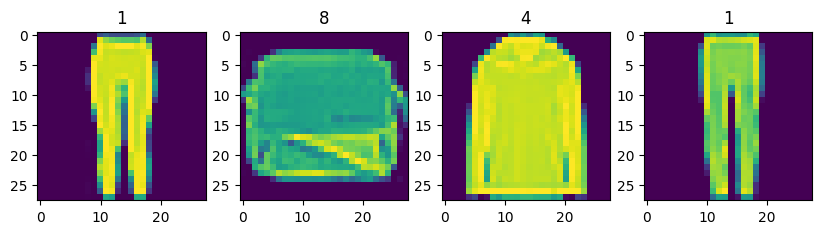

In [ ]:
#we will create some subplots
#setup the subplot formatting
#fig is the whole conatiner of images while ax is each of the individual img

fig,ax=plt.subplots(ncols=4,figsize=(10,10))

#loop 4 time sto get 4 imgs
for  i in range(4):
  sample=dataiterator.next()
  #we use np.squeeze in order to reduse the dimensions of the array so that it beocmes easy
  #imshow is just a basic funtion to display an image
  ax[i].imshow(np.squeeze(sample['image']))
  #this is a very optional line it is of no requirement
  ax[i].title.set_text(sample['label'])

In [ ]:
#scale and return our images
def scale_images(data):
  image=data["image"]
  return (image/225)
  #we have taken 225 in order to normalize our data and limit it to the size of 0-1

now we will start to build our NEURAL NETWORK from the next set.

* Map
* cache
* shuffle
* batch
* prefetch

In [ ]:
#this is the DATA PIPELINE
#hence we start the steps
##running the dataset through the scale_images preprcessings step
ds=ds.map(scale_images)
#we will cache the dataset  for that batch
ds=ds.cache()
#shuffling the data set
ds=ds.shuffle(60000)
#dividing the data into batches of 128 imgs per batch
ds=ds.batch(128)
#it reduces the likelihood of bottleneck(loading the next batch of data into mem beofre the computation is finished in the existing batch to save time)
ds=ds.prefetch(64)#the arg passed is the buffer size

In [ ]:
ds.as_numpy_iterator().next().shape
#hence we get 128 samples in the dimention of 28*28

(128, 28, 28, 1)

##We will build 2 models now
1) generator model - that will generate the images.

2) discriminator model - that will discriminaate between the images and spot the fake

In [ ]:
#importing our modeling components we will use them
from tensorflow.keras.models import Sequential#it takes one imput and gives 1 output {one-by-one}
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

Building a generator

the basic idea behind building a generator is that :-
A generator takes a basic input and mimics the input to make some different kind of fake data set in our case the generator will generate fake images set .
for more info  read this articlle:-https://livebook.manning.com/concept/deep-learning/generator#:~:text=concept%20generator%20in%20category%20deep%20learning&text=The%20generator%20takes%20in%20some,replicas%20from%20the%20training%20dataset.

In [ ]:
def build_generator():
  model=Sequential()
  #the dense layer parameter {7*7*128 implies that add a layer with 7*7*128 neurons}
  model.add(Dense(7*7*128,input_dim=128))
  #leakyrelu is used to remove dead neuron and used as a NO NON-zero slop for some values
  model.add(LeakyReLU(0.2))
  #takes the values and reshapes them  into 7x7x128
  model.add(Reshape((7,7,128)))
  #we need to get the image of the dimension 7x7x1 but so from the next step we will look forward to do that

  #upsampleing block 1
  #it will double the spatial quality therefore it beccomes 14x14x128
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  #upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  #convolutionn block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #convolutionn block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))
  #repeating these steps just lets the model have more learning as it increaases the number of parameters

  #conv layer to get to one channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
  return model

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

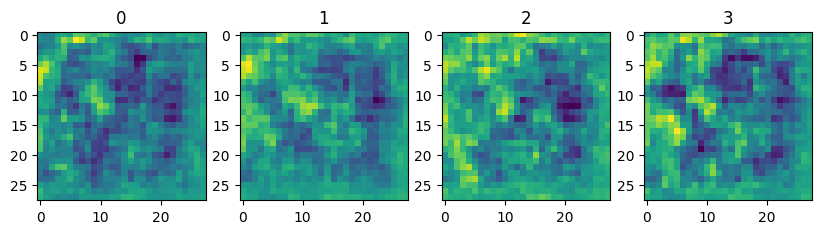

In [ ]:
#visualizing what our images would look like
#the first parameter i.e 4 implies the number of images we want to generate
img=generator(np.random.rand(4,128,1))
fig,ax=plt.subplots(ncols=4,figsize=(10,10))
#loop 4 time to get 4 imgs
for  i , img in enumerate(img):
  #we use the enumerate functio to match the value of i amd img togethere
  #imshow is just a basic funtion to display an image
  ax[i].imshow(np.squeeze(img))
  #this is a very optional line it is of no requirement
  ax[i].title.set_text(i)

In [ ]:
def build_discriminator():
  model=Sequential()

  #first cov block
  model.add(Conv2D(3how are2,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #second cov block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

   #3rd  conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

   #4th conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten and then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))

  return model

In [ ]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
#deep neural networks always take a batch or a set of images and not just a single image so if you try it with a single image it will throw an error
#hence we take a group of 4 imgs
img=generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 138ms/step


(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 221ms/step


array([[0.4891263 ],
       [0.48911157],
       [0.489156  ],
       [0.48934418]], dtype=float32)

##4.Training the GENERATOR AND DISCRIMINATOR

it is the most improtant and tough step

* the speed balance between the generators and discriminators training should be correctly maintained.
* input a random noise also important in order to train our model.

4.1 here we will setup our losses and optimizers

In [ ]:
#Adam is the optimizer for both
from tensorflow.keras.optimizers import Adam
#binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
#the parameter in the Adam (learning_rate) is a default value
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.0001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

4.2 Building a subclass Model

In [ ]:
#importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
#def train_step is called when we want to fit the function
#`*args` is a positional argument and `**kwargs` is a keyword argument

class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
   #pass args and kwargs to our base class
    super().__init__(*args,**kwargs)
    #creating attributes for gen and discrim
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    #compile with base class
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss
#we've take a batch 128 images of size 28*28*1
  def train_step(self,batch):
    #get a batch of images
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training = False)
    #training the discriminator
    with tf.GradientTape() as d_tape:
        #passing the real and fake images to the discriminator
        yhat_real=self.discriminator(real_images,training=True)
        yhat_fake=self.discriminator(fake_images,training=True)
        yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0) #predictions from the discriminators

        #create labels for real and fake imgs
        #here `tf.zeros_like(yhat_real)`are the labes for real images=0 and for the fake ones we keep them 1
        y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)#acctual predictions

        #add some noise to the outputs
        #0.15 is just arandom value and .uniform means that the
        noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
        noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
        y_realfake += tf.concat([noise_real,noise_fake],axis=0)


        #calculate loss
        total_d_loss=self.d_loss(y_realfake,yhat_realfake)

        #apply backpropagation --neural netwrok learning
    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))


    #by this we have finished our discriminator part

    #we start our training part of generator
    with tf.GradientTape() as g_tape:
      #generate new images
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)

      #create predicted labels
      #we run our generated images through the discriminator,training=fales because we dont want our discrim to be learning wwhen we ask it to give thhe results
      predicted_labels=self.discriminator(gen_images,training=False)

      #calculate loss
       #we want our discriminator to think that the generated images are real hence we keep the labes as tf..zeros_like
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    #apply backpropagation
    ggrd=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrd,self.trainable_variables))

    return{ "d_loss":total_d_loss,"g_loss":total_g_loss}

In [ ]:
#creating the instance of our subclass model
fashgan=FashionGAN(generator,discriminator)

In [ ]:
#complie thhe model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

4.3 Building a Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self,num_img=3,latenet_dim=128):
    self.num_img=num_img
    self.latenet_dim=latenet_dim

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vecotors=tf.random.uniform((self.num_img,self.latenet_dim,1))
    generated_images=self.model.generator(random_latent_vecotors)
    generated_images *= 225
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(os.path.join('drive/MyDrive/GANimages',f'generated_img_{epoch}_{i}.png'))

4.3 TRAIN

In [ ]:
#recomended epochs is 2000
hist=fashgan.fit(ds,epochs=40,callbacks=[ModelMonitor()])

Epoch 1/40
  6/469 [..............................] - ETA: 1:17 - d_loss: 0.2862 - g_loss: 0.6948

469/469 [==============================] - 79s 169ms/step - d_loss: 0.2814 - g_loss: 0.5897
Epoch 2/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2783 - g_loss: 0.4395
Epoch 3/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2735 - g_loss: 0.4063
Epoch 4/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2754 - g_loss: 0.3743
Epoch 5/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2746 - g_loss: 0.3546
Epoch 6/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2737 - g_loss: 0.3599
Epoch 7/40
469/469 [==============================] - 78s 166ms/step - d_loss: 0.2731 - g_loss: 0.3422
Epoch 8/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2704 - g_loss: 0.3264
Epoch 9/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2716 - g_loss: 0.3345
Epoch 10/40
469/469 [==============================] - 78s 167ms/step - d_loss: 0.27

4.4 Review our performance

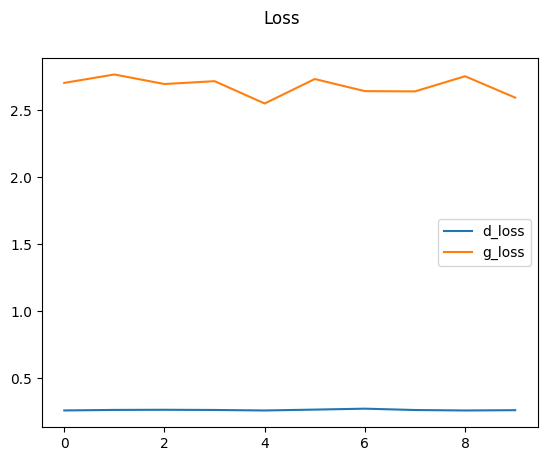

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

##5 Test our Generator


5.1 Generate images

In [ ]:
immgs=generator.predict(tf.random.normal((16,128,1)))
immgs

1/1 [==============================] - 0s 344ms/step


array([[[[2.34468511e-09],
         [4.17283075e-26],
         [1.08480864e-34],
         ...,
         [4.08916279e-08],
         [3.22327942e-05],
         [5.83105301e-03]],

        [[3.54012175e-13],
         [1.64189847e-38],
         [0.00000000e+00],
         ...,
         [1.88247443e-12],
         [6.33175148e-08],
         [2.53314734e-04]],

        [[6.96763966e-15],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [2.50924744e-15],
         [9.79414438e-10],
         [3.04471578e-05]],

        ...,

        [[3.78161940e-06],
         [4.74771622e-21],
         [2.64742411e-30],
         ...,
         [1.19701315e-21],
         [6.61065540e-16],
         [2.28114971e-09]],

        [[4.47231671e-03],
         [5.08614288e-12],
         [1.29133324e-17],
         ...,
         [1.05562945e-13],
         [2.89913843e-10],
         [3.59893420e-06]],

        [[1.57169253e-01],
         [1.19167798e-05],
         [2.56342680e-08],
         ...,
 

In [ ]:
ds["target"].value_counts().plot(kind="bar",color=["skyblue","black"])
for r  in range(4):
  for c in range(4):
    axx[r][c].imshow(immgs[r+1]*[c+1]-1)

TypeError: ignored